In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
ab = pd.read_csv('../data/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/Best_Know1Fxs.csv', header=None).values[0]

In [3]:
D = 10
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

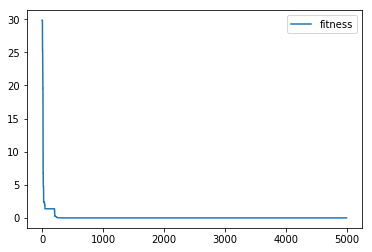

Run cancelled: `max_time` reached.
A proper report should be shown here :)
Total time: 00:14


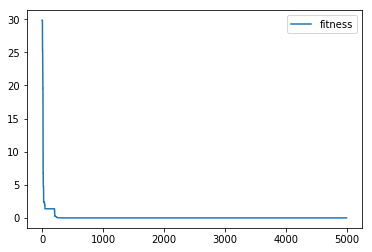

In [4]:
opt.run(total_generations, update_each=1000)

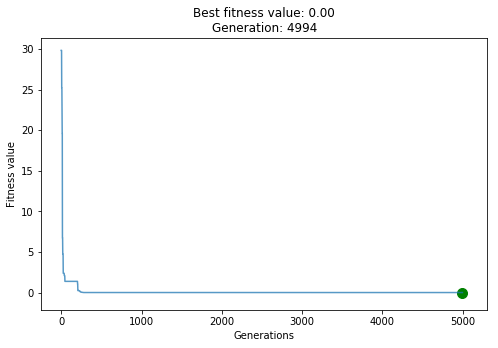

In [5]:
opt.recorder.plot()

In [8]:
opt.best

Individual(dimensions=10, lower_limit=-5, upper_limit=5, idx=9, gen=4998, fitness_value=8.299516720267986e-80, constraints=[-91.286], constraints_sum=0.0, is_feasible=True, data=array([ 1.22787847e-40,  7.43913337e-41,  2.45253395e-41, -1.46361015e-40,
       -1.13368581e-40, -1.07938265e-40, -5.09057492e-41,  8.25373742e-41,
       -8.01286756e-41, -5.80345334e-42]))